![LU Logo](https://www.df.lu.lv/fileadmin/user_upload/LU.LV/Apaksvietnes/Fakultates/www.df.lu.lv/Par_mums/Logo/DF_logo/01_DF_logo_LV.png)

# Python Visualization Libraries

## Lesson Overview

We will cover the following topics in this lesson:

* Plotly visualization library overview
* mechanics of creating plots



## Lesson Objectives

At the end of this lesson you should be able to:

* create basic plots using plotly
* create interactive plots using plotly
* create some intermediete plots using plotly
* create some advanced plots using plotly



### Import required libraries

In [ ]:
# generally imports go at the top of a notebook
# python version
import sys
print(f"Python version: {sys.version}")

# import pandas
import pandas as pd
print(f"Pandas version: {pd.__version__}")
# we will use pandas to read in our data and manipulate it

# import Plotly the object of this lesson
import plotly
print(f"Plotly version: {plotly.__version__}")

# if you do not have plotly you should install it with
# pip install plotly


### Topic 1: - Plotly visualization library

![Plotly](https://upload.wikimedia.org/wikipedia/commons/8/8a/Plotly-logo.png)

Plotly library is a powerful visualization library that can be used to create interactive plots. It is a very powerful library that can be used to create a wide variety of plots. It is also a very complex library that has a steep learning curve. We will cover the basics of plotly in this lesson.

#### History of Plotly library and the company behind it

Plotly is a technical computing company headquartered in Montreal, Canada. The company develops online data analytics and visualization tools. Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

Plotly the Python library was created by Plotly the company in 2012. The library was open sourced in 2015.
Licensing is currently under MIT license: https://plotly.com/python/is-plotly-free/

Plotly the Python library is open source and free to use. Plotly the company offers products based on the open source library. Plotly the company also offers a commercial product called Dash Enterprise that is built on top of the open source library + Flask + React.js. Dash Enterprise is a commercial product that is not free to use and requires a license.

### Technical underpinning of Plotly library

Plotly library utilizes following Javascript libraries when used in a browser:

* plotly.js - a JavaScript library for creating interactive plots
* d3.js - a JavaScript library for manipulating documents based on data

### Documentations of Plotly library for Python

* Plotly library documentation: https://plotly.com/python/



## First Plotly plot

We will be using Plotly Express which is an easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

More on Plotly Express: https://plotly.com/python/plotly-express/

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([3, 4, 7]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'sample figure'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


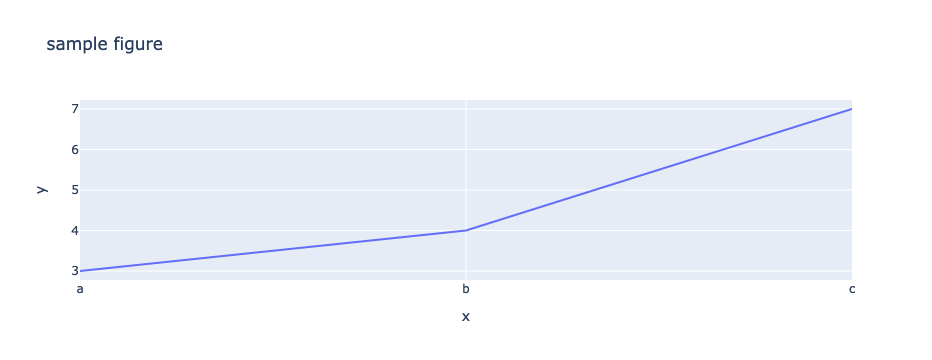

In [12]:
import plotly.express as px


fig = px.line(x=["a","b","c"], y=[3,4,7], title="sample figure")
print(fig) # to display the figure in the notebook
fig.show() # we call show to display the figure

### Philosophy of Plotly Express

As seen from print(fig) command, Figure object is a dictionary-like object. It contains data and layout keys. Data is a list of traces, and layout is a dictionary of keys that define the layout of the figure.

Thus our task is to provide appropriate data and layout to the Figure object.


## Basic Plotly plot


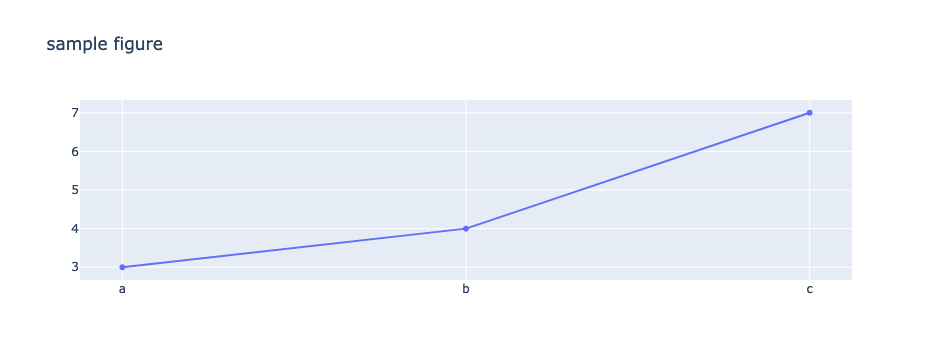

In [13]:
# let's create a similar plot using Plotly itself using the plotly.graph_objects module
import plotly.graph_objects as go # very common to import as go
# 
fig = go.Figure(data=go.Scatter(x=["a","b","c"], y=[3,4,7]))
# let's add a title after a figure is created
fig.update_layout(title="sample figure")
fig.show()

## Plotting a function

Let's plot the following cube function: $f(x) = x^3 - 5$

The range of the function will be from -5 to 5. We will plot the function using 101 points.

In [14]:
# our first step is to generate the data using the cubic function.

# we will use numpy to generate the data
import numpy as np
# we will use the linspace function to generate the x values
x = np.linspace(-5,5,101)

# Question to students why 101 and not 100?

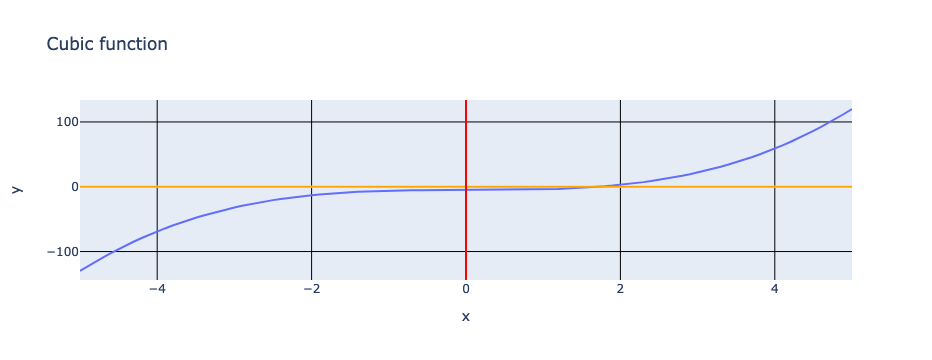

In [15]:
# now we can generate the y values
y = x**3 - 5 # remember numpy will apply the exponent to each element of the array

# now we can plot the data
fig = go.Figure(layout = {"title":"Cubic function"}, data=go.Scatter(x=x, y=y))
# fig.update_layout(title="Cubic Function") # notice we already passed layout function above
# let's add x and y axis labels
fig.update_xaxes(title="x")
fig.update_yaxes(title="y")
# let's add a grid
fig.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor='black'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='black'))
# let's add a horizontal line at y=0
fig.add_hline(y=0, line=dict(color='orange', width=2))
fig.add_vline(x=0, line=dict(color='red', width=2))

# all of the above layout options could have been added at once using the update_layout function
# alternatively we could have passed a layout dictionary to the Figure function

fig.show()

#### Exercise 1.1 - Plot a quadratic function

Create a basic plot using plotly express or go. We want to plot the following quadratic function:

`f(x) = x^2 + 2x + 1` in the range of x from -10 to 10 using 0.5 step size.

Assign appropriate labels to the axes and the plot itself.

## Intermediate Plotly Graphs

### Stacked Bar Charts

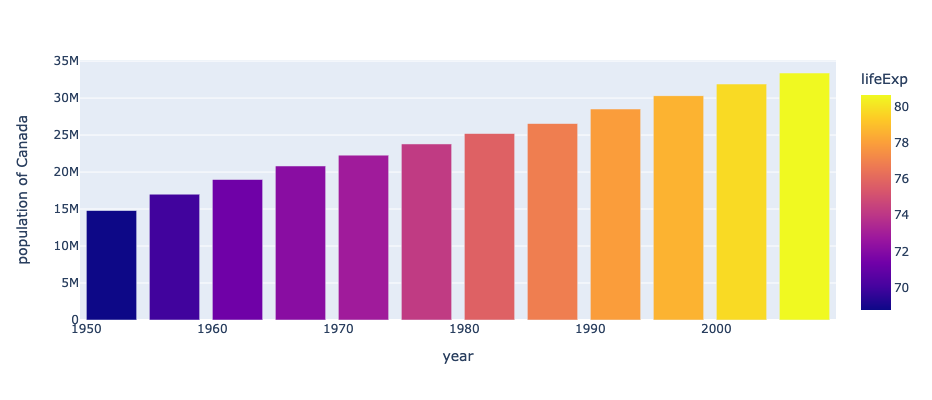

In [16]:


df = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

### Interactivity of Plotly

Notice how in the above graphs we can zoom in, we can save the graph as a png file, we can pan the graph, we can select a region of the graph and plot only that region, we can hover over the graph and see the values of the data points.

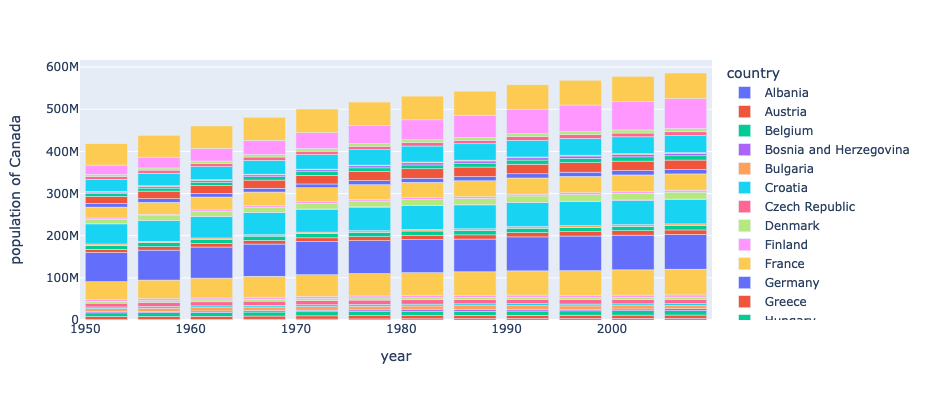

In [17]:
df = px.data.gapminder().query("continent == 'Europe'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

### Activating data selection

Notice how we can click on some country and the graph will show/hide that country. We can click on multiple countries and the graph will show only those countries.

Note: no data on Latvia is provided by `px.data.gapminder().query("continent == 'Europe'")`

#### Bonus exercise idea
Bonus idea: find data source that has data on Latvia and plot it.

## Histograms

Histograms are used to plot the distribution of a variable. Histograms are very useful for exploratory data analysis.

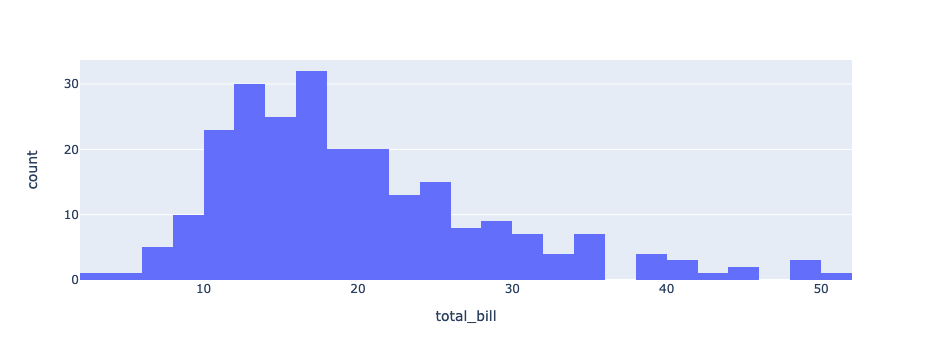

In [18]:
df = px.data.tips() 
# px.data.tips() is a pandas dataframe of famous tips dataset
fig = px.histogram(df, x="total_bill")
fig.show()

## Heatmaps

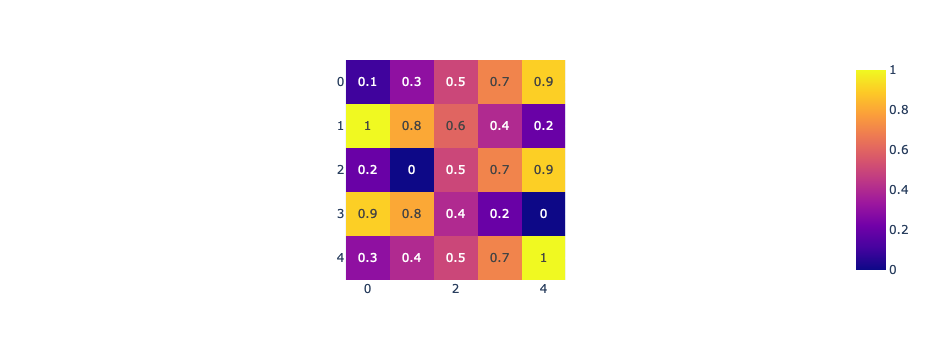

In [19]:
z = [[.1, .3, .5, .7, .9],
     [1, .8, .6, .4, .2],
     [.2, 0, .5, .7, .9],
     [.9, .8, .4, .2, 0],
     [.3, .4, .5, .7, 1]]

fig = px.imshow(z, text_auto=True)
fig.show()

## Financial Charts

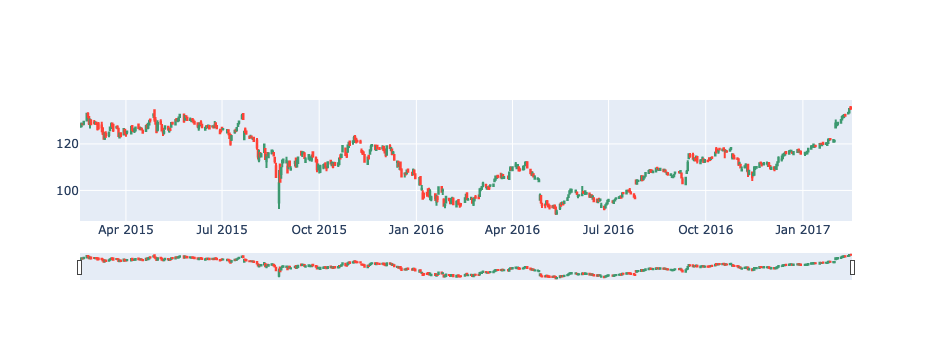

In [20]:
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

### Note on selecting subset of data in above chart

Because x axis is date, we can select a subset of data by selecting a region on the x axis.

## Complex Plotly full plot example with multiple subplots

https://plotly.com/python/map-subplots-and-small-multiples/

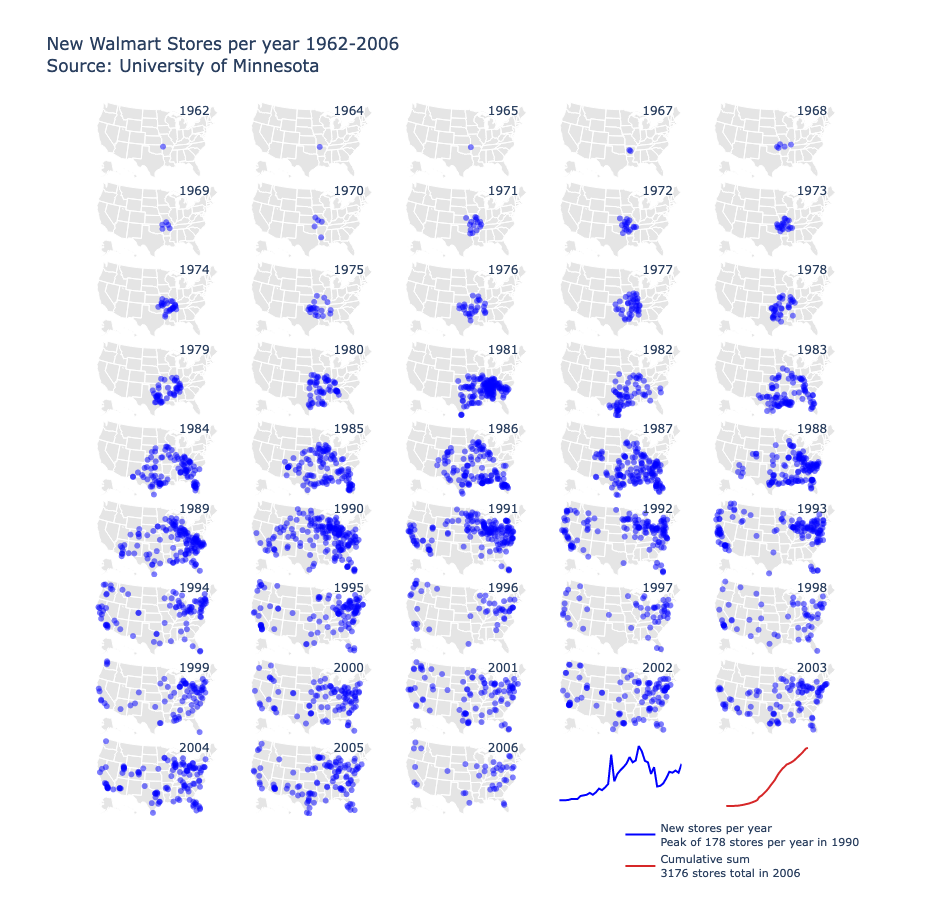

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df.head()

data = []
layout = dict(
    title = 'New Walmart Stores per year 1962-2006<br>\
Source: <a href="http://www.econ.umn.edu/~holmes/data/WalMart/index.html">\
University of Minnesota</a>',
    # showlegend = False,
    autosize = False,
    width = 1000,
    height = 900,
    hovermode = False,
    legend = dict(
        x=0.7,
        y=-0.1,
        bgcolor="rgba(255, 255, 255, 0)",
        font = dict( size=11 ),
    )
)
years = df['YEAR'].unique()

for i in range(len(years)):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    lons = list(df[ df['YEAR'] == years[i] ]['LON'])
    lats = list(df[ df['YEAR'] == years[i] ]['LAT'])
    # Walmart store data
    data.append(
        dict(
            type = 'scattergeo',
            showlegend=False,
            lon = lons,
            lat = lats,
            geo = geo_key,
            name = int(years[i]),
            marker = dict(
                color = "rgb(0, 0, 255)",
                opacity = 0.5
            )
        )
    )
    # Year markers
    data.append(
        dict(
            type = 'scattergeo',
            showlegend = False,
            lon = [-78],
            lat = [47],
            geo = geo_key,
            text = [years[i]],
            mode = 'text',
        )
    )
    layout[geo_key] = dict(
        scope = 'usa',
        showland = True,
        landcolor = 'rgb(229, 229, 229)',
        showcountries = False,
        domain = dict( x = [], y = [] ),
        subunitcolor = "rgb(255, 255, 255)",
    )


def draw_sparkline( domain, lataxis, lonaxis ):
    ''' Returns a sparkline layout object for geo coordinates  '''
    return dict(
        showland = False,
        showframe = False,
        showcountries = False,
        showcoastlines = False,
        domain = domain,
        lataxis = lataxis,
        lonaxis = lonaxis,
        bgcolor = 'rgba(255,200,200,0.0)'
    )

# Stores per year sparkline
layout['geo44'] = draw_sparkline({'x':[0.6,0.8], 'y':[0,0.15]}, \
                                 {'range':[-5.0, 30.0]}, {'range':[0.0, 40.0]} )
data.append(
    dict(
        type = 'scattergeo',
        mode = 'lines',
        lat = list(df.groupby(by=['YEAR']).count()['storenum']/1e1),
        lon = list(range(len(df.groupby(by=['YEAR']).count()['storenum']/1e1))),
        line = dict( color = "rgb(0, 0, 255)" ),
        name = "New stores per year<br>Peak of 178 stores per year in 1990",
        geo = 'geo44',
    )
)

# Cumulative sum sparkline
layout['geo45'] = draw_sparkline({'x':[0.8,1], 'y':[0,0.15]}, \
                                 {'range':[-5.0, 50.0]}, {'range':[0.0, 50.0]} )
data.append(
    dict(
        type = 'scattergeo',
        mode = 'lines',
        lat = list(df.groupby(by=['YEAR']).count().cumsum()['storenum']/1e2),
        lon = list(range(len(df.groupby(by=['YEAR']).count()['storenum']/1e1))),
        line = dict( color = "rgb(214, 39, 40)" ),
        name ="Cumulative sum<br>3176 stores total in 2006",
        geo = 'geo45',
    )
)

z = 0
COLS = 5
ROWS = 9
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1
        if z > 42:
            break

fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=800)
fig.show()

## Lesson Overview

What have we learned?

* Plotly visualization library overview
* Plotly Express
* Plotly figures
* Plotly Graph Objects
* Plotly bar charts
* Plotly stacked bar charts
* Plotly histograms
* Plotly heatmaps
* Plotly subplots

## Exercises for further practice

### Plotting an Elephant or Batman function

https://www.physicsforums.com/threads/graph-of-an-elephant.998283/

Implement in Python!

### Exercise 2

Create a financial chart for a different stock.

## Additional Resources

### Topic 1 - resources

- [Plotly Advanced Plots](https://plotly.com/python/) 

### Topic 2 - Transforms

- [Transforming data](https://plotly.com/python/#transforms)

### Topic 3 - Custom Controls

- [Custom Controls](https://plotly.com/python/#controls)
